In [18]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
food_price_changes = pd.read_csv("Overall_USDA_ChangeInFoodPrices_2019-2021.csv")

food_types = pd.read_csv("FoodItems_USDA_ChangeInFoodPrices_2018-2021.csv",index_col=0)

In [3]:
food_price_changes

,Consumer Price Index item,Relative importance1,Month-to-month Oct. 2020 to Nov. 2020,Year-over-year Nov. 2019 to Nov. 2020,Year-to-date avg. 2019 to avg. 2020,Annual 2018,Annual 2019,20-year historical average,Forecast range 2020,Forecast range 2021
0,All food,100.0,-0.3,3.7,3.3,1.4,1.9,2.3,2.5 to 3.5,2.0 to 3.0
1,Food away from home,44.5,0.1,3.8,3.2,2.6,3.1,2.8,2.5 to 3.5,2.0 to 3.0
2,Food at home,55.5,-0.6,3.6,3.5,0.4,0.9,2.0,3.0 to 4.0,1.0 to 2.0


Text(0.5, 1.0, 'Glimpse at Change in Consumer Price Index\nfrom Previous Years Through 2020')

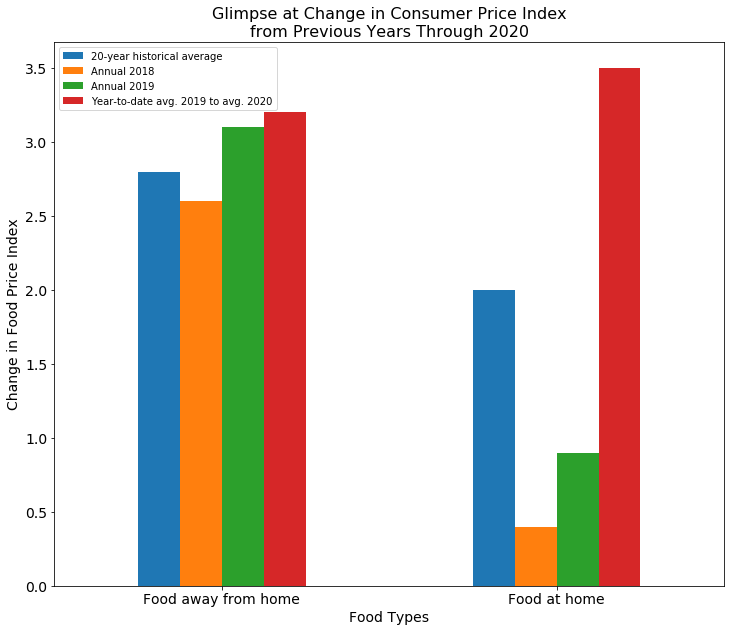

In [4]:
# creating grouped bar chart 
overall = food_price_changes[["Consumer Price Index item","20-year historical average","Annual 2018",
                              "Annual 2019","Year-to-date avg. 2019 to avg. 2020"]]
overall = overall.set_index("Consumer Price Index item",drop=True)
overall = overall.drop(["All food"])

ov = overall.plot.bar(figsize=(12,10),fontsize=14,rot=0)
ov.set_ylabel("Change in Food Price Index",fontsize=14)
ov.set_xlabel("Food Types",fontsize=14)
ov.set_title("Glimpse at Change in Consumer Price Index\nfrom Previous Years Through 2020",fontsize=16 )

In [5]:
food_types

,Relative importance1,Month-to-month Oct. 2020 to Nov. 2020,Year-over-year Nov. 2019 to Nov. 2020,Year-to-date avg. 2019 to avg. 2020,Annual 2018,Annual 2019,20-year historical average,Forecast range 2020,Forecast range 2021
Consumer Price Index item,,,,,,,,,
Beef and veal,3.4,-0.1,7.5,9.8,1.4,1.6,4.1,9.0 to 10.0,-2.5 to -1.5
Pork,2.3,-1.6,5.1,6.3,-0.4,1.2,2.0,6.0 to 7.0,-0.5 to 0.5
Other meats,1.7,0.0,4.6,4.3,-0.4,0.9,2.1,3.5 to 4.5,-0.5 to 0.5
Poultry,2.4,0.0,7.0,5.6,0.3,-0.3,2.0,5.0 to 6.0,-0.5 to 0.5
Fish and seafood,2.0,0.5,4.7,3.1,2.1,1.6,2.4,2.5 to 3.5,1.5 to 2.5
Eggs,0.7,1.4,4.3,4.4,10.8,-10.0,3.1,4.0 to 5.0 (-),-0.5 to 0.5
Dairy products,5.6,0.2,3.6,4.3,-0.5,1.0,1.6,3.5 to 4.5,0.0 to 1.0
Fats and oils,1.5,-1.6,1.5,1.4,0.1,-0.7,2.2,1.0 to 2.0,-0.5 to 0.5
Fresh fruits,3.8,-1.0,1.9,-0.9,1.0,-1.4,1.6,-1.5 to -0.5,0.0 to 1.0


Text(0.5, 1.0, 'Glimpse at Change in Food Prices from Previous Years Through 2020')

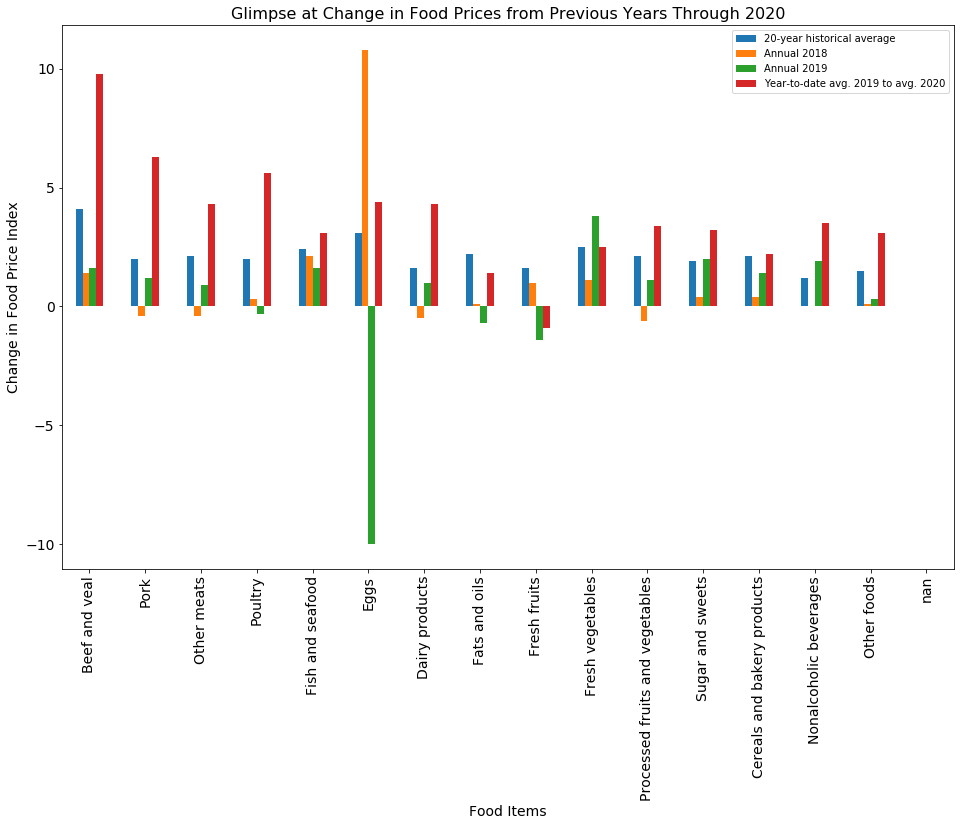

In [6]:
# plotting past numbers to get an idea of trends

years = food_types[["20-year historical average","Annual 2018", "Annual 2019","Year-to-date avg. 2019 to avg. 2020"]]

yr = years.plot.bar(figsize=(16,10),fontsize=14)
yr.set_ylabel("Change in Food Price Index",fontsize=14)
yr.set_xlabel("Food Items",fontsize=14)
yr.set_title("Glimpse at Change in Food Prices from Previous Years Through 2020",fontsize=16 )

In [7]:
food_sales = pd.read_csv("Formatted_USDA_MonthlyFoodSales.csv")

In [8]:

years_grouped = food_sales.groupby("Year")
years_sum = years_grouped.sum()
years_sum

,Nominal_FAH,Nominal_FAFH,Total_Nominal_Food_Sales,Constant_FAH,Constant_FAFH,Total_Constant_Dollar_Food_Sales
Year,,,,,,
1997,377057.13,285731.31,662788.44,278082.61,221669.24,497967.39
1998,384865.13,301177.85,686042.97,278555.37,227706.14,504457.20
1999,406025.69,316740.37,722766.07,288322.76,233670.37,520419.49
2000,423780.26,341797.81,765578.07,294298.89,246337.16,538987.07
2001,443045.62,354391.35,797436.98,297918.80,248216.62,544354.12
2002,451037.94,370348.89,821386.81,299493.28,252992.10,550815.14
2003,470206.40,391124.46,861330.87,305607.97,261608.80,565429.31
2004,495820.48,419540.44,915360.89,310486.95,272533.49,580885.70
2005,525025.07,444513.97,969539.04,322539.09,279947.29,600591.44


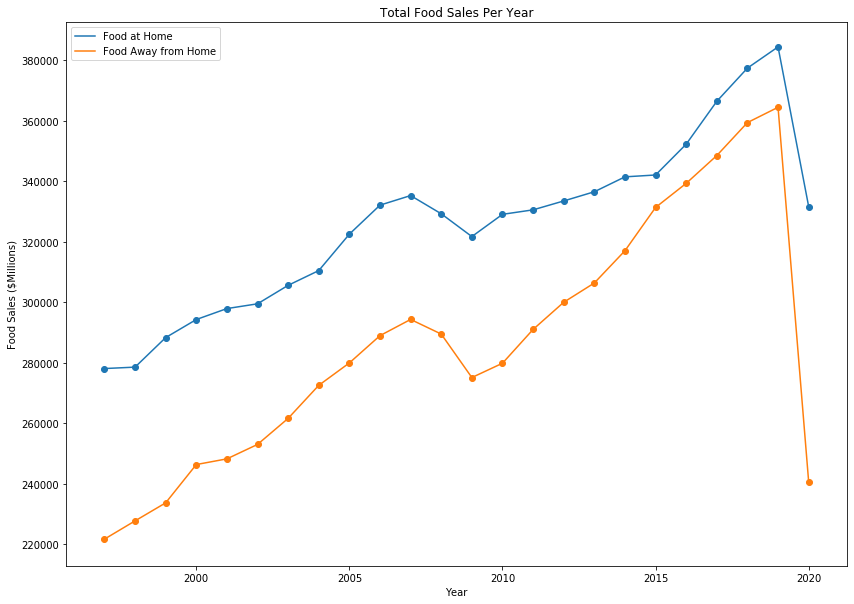

In [9]:
plt.figure(figsize=(14,10))
plt.scatter(years_sum.index,years_sum["Constant_FAH"])
plt.plot(years_sum.index,years_sum["Constant_FAH"],label = "Food at Home")

plt.scatter(years_sum.index,years_sum["Constant_FAFH"])
plt.plot(years_sum.index,years_sum["Constant_FAFH"],label = "Food Away from Home")

plt.legend()

plt.xlabel("Year")
plt.ylabel("Food Sales ($Millions)")
plt.title("Total Food Sales Per Year")
plt.rcParams.update({'font.size': 14})
plt.show()

\* 2020 data only covers January-October

In [10]:
recipe_2017 = pd.read_csv("RecipeSearchInterest_2017.csv")
recipe_2017 = recipe_2017.drop("Week",axis=0)
recipe_2018 = pd.read_csv("RecipeSearchInterest_2018.csv")
recipe_2018 = recipe_2018.drop("Week",axis=0)
recipe_2019 = pd.read_csv("RecipeSearchInterest_2019.csv")
recipe_2019 = recipe_2019.drop("Week",axis=0)
recipe_2020 = pd.read_csv("RecipeSearchInterest_2020.csv")
recipe_2020 = recipe_2020.drop("Week",axis=0)


In [11]:
recipe_2017["Month"] = ""
recipe_2017["Year"] = "2017"
recipe_2017 = recipe_2017.reset_index(drop=False)
recipe_2017 = recipe_2017.rename(columns={"index":"DateCollected"})
recipe_2017 = recipe_2017.reset_index(drop=False)

for i in range(len(recipe_2017)):
    x = recipe_2017.iloc[i,1].split("-")[1]
    if x =="01":
        recipe_2017.iloc[i,3] = "January"
    elif x == "02":
        recipe_2017.iloc[i,3] = "February"
    elif x == "03":
        recipe_2017.iloc[i,3] = "March"
    elif x == "04":
        recipe_2017.iloc[i,3] = "April"
    elif x == "05":
        recipe_2017.iloc[i,3] = "May"
    elif x == "06":
        recipe_2017.iloc[i,3] = "June"
    elif x == "07":
        recipe_2017.iloc[i,3] = "July"
    elif x == "08":
        recipe_2017.iloc[i,3]= "August"
    elif x == "09":
        recipe_2017.iloc[i,3] = "September"
    elif x == "10":
        recipe_2017.iloc[i,3]= "October"
    elif x == "11":
        recipe_2017.iloc[i,3]= "November"
    elif x == "12":
        recipe_2017.iloc[i,3] = "December"

        
recipe_2017.head()

,index,DateCollected,Category: All categories,Month,Year
0,0,2017-01-01,47,January,2017
1,1,2017-01-08,49,January,2017
2,2,2017-01-15,34,January,2017
3,3,2017-01-22,59,January,2017
4,4,2017-01-29,37,January,2017


In [12]:
recipe_2018["Month"] = ""
recipe_2018["Year"] = "2018"
recipe_2018 = recipe_2018.reset_index(drop=False)
recipe_2018 = recipe_2018.rename(columns={"index":"DateCollected"})
recipe_2018 = recipe_2018.reset_index(drop=False)

for i in range(len(recipe_2018)):
    x = recipe_2018.iloc[i,1].split("-")[1]
    if x =="01":
        recipe_2018.iloc[i,3] = "January"
    elif x == "02":
        recipe_2018.iloc[i,3]= "February"
    elif x == "03":
        recipe_2018.iloc[i,3] = "March"
    elif x == "04":
        recipe_2018.iloc[i,3] = "April"
    elif x == "05":
        recipe_2018.iloc[i,3] = "May"
    elif x == "06":
        recipe_2018.iloc[i,3] = "June"
    elif x == "07":
        recipe_2018.iloc[i,3] = "July"
    elif x == "08":
        recipe_2018.iloc[i,3] = "August"
    elif x == "09":
        recipe_2018.iloc[i,3] = "September"
    elif x == "10":
        recipe_2018.iloc[i,3] = "October"
    elif x == "11":
        recipe_2018.iloc[i,3] = "November"
    elif x == "12":
        recipe_2018.iloc[i,3] = "December"

recipe_2018.head()

,index,DateCollected,Category: All categories,Month,Year
0,0,2018-01-07,22,January,2018
1,1,2018-01-14,25,January,2018
2,2,2018-01-21,18,January,2018
3,3,2018-01-28,24,January,2018
4,4,2018-02-04,25,February,2018


In [13]:

recipe_2019["Month"] = ""
recipe_2019["Year"] = "2019"
recipe_2019 = recipe_2019.reset_index(drop=False)
recipe_2019 = recipe_2019.rename(columns={"index":"DateCollected"})
recipe_2019 = recipe_2019.reset_index(drop=False)

for i in range(len(recipe_2019)):
    x = recipe_2019.iloc[i,1].split("-")[1]
    if x =="01":
        recipe_2019.iloc[i,3] = "January"
    elif x == "02":
        recipe_2019.iloc[i,3] = "February"
    elif x == "03":
        recipe_2019.iloc[i,3] = "March"
    elif x == "04":
        recipe_2019.iloc[i,3] = "April"
    elif x == "05":
        recipe_2019.iloc[i,3] = "May"
    elif x == "06":
        recipe_2019.iloc[i,3] = "June"
    elif x == "07":
        recipe_2019.iloc[i,3] = "July"
    elif x == "08":
        recipe_2019.iloc[i,3] = "August"
    elif x == "09":
        recipe_2019.iloc[i,3] = "September"
    elif x == "10":
        recipe_2019.iloc[i,3] = "October"
    elif x == "11":
        recipe_2019.iloc[i,3] = "November"
    elif x == "12":
        recipe_2019.iloc[i,3] = "December"
        

recipe_2019.head()

,index,DateCollected,Category: All categories,Month,Year
0,0,2019-01-06,82,January,2019
1,1,2019-01-13,85,January,2019
2,2,2019-01-20,98,January,2019
3,3,2019-01-27,90,January,2019
4,4,2019-02-03,87,February,2019


In [14]:
recipe_2020["Month"] = ""
recipe_2020["Year"] = "2020"
recipe_2020 = recipe_2020.reset_index(drop=False)
recipe_2020 = recipe_2020.rename(columns={"index":"DateCollected"})
recipe_2020 = recipe_2020.reset_index(drop=False)

for i in range(len(recipe_2020)):
    x = recipe_2020.iloc[i,1].split("-")[1]
    if x =="01":
        recipe_2020.iloc[i,3] = "January"
    elif x == "02":
        recipe_2020.iloc[i,3] = "February"
    elif x == "03":
        recipe_2020.iloc[i,3] = "March"
    elif x == "04":
        recipe_2020.iloc[i,3] = "April"
    elif x == "05":
        recipe_2020.iloc[i,3] = "May"
    elif x == "06":
        recipe_2020.iloc[i,3] = "June"
    elif x == "07":
        recipe_2020.iloc[i,3] = "July"
    elif x == "08":
        recipe_2020.iloc[i,3] = "August"
    elif x == "09":
        recipe_2020.iloc[i,3] = "September"
    elif x == "10":
        recipe_2020.iloc[i,3] = "October"
    elif x == "11":
        recipe_2020.iloc[i,3] = "November"
    elif x == "12":
        recipe_2020.iloc[i,3] = "December"
        
recipe_2020.head()

,index,DateCollected,Category: All categories,Month,Year
0,0,2020-01-05,46,January,2020
1,1,2020-01-12,34,January,2020
2,2,2020-01-19,49,January,2020
3,3,2020-01-26,35,January,2020
4,4,2020-02-02,27,February,2020


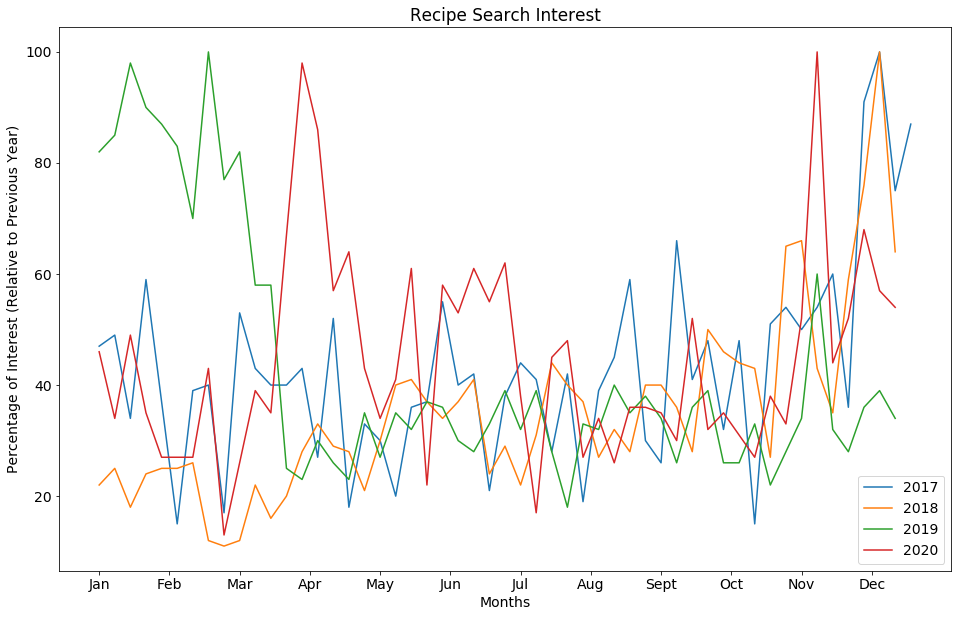

In [44]:
recipe_2017["Category: All categories"]=recipe_2017["Category: All categories"].astype("int")
recipe_2018["Category: All categories"]=recipe_2018["Category: All categories"].astype("int")
recipe_2019["Category: All categories"]=recipe_2019["Category: All categories"].astype("int")
recipe_2020["Category: All categories"]=recipe_2020["Category: All categories"].astype("int")


plt.figure(figsize=(16,10))
#plt.scatter(recipe_2017["index"], recipe_2017["Category: All categories"])
plt.plot(recipe_2017["index"], recipe_2017["Category: All categories"],label = "2017")

#plt.scatter(recipe_2018["index"], recipe_2018["Category: All categories"])
plt.plot(recipe_2018["index"], recipe_2018["Category: All categories"],label = "2018")

#plt.scatter(recipe_2019["index"], recipe_2019["Category: All categories"])
plt.plot(recipe_2019["index"], recipe_2019["Category: All categories"],label = "2019")

#plt.scatter(recipe_2020["index"], recipe_2020["Category: All categories"])
plt.plot(recipe_2020["index"], recipe_2020["Category: All categories"],label = "2020")

plt.xticks(ticks = np.arange(0, 54, 4.5), labels = ["Jan","Feb","Mar","Apr","May","Jun",
                                     "Jul","Aug","Sept","Oct","Nov","Dec"])
plt.legend()

plt.xlabel("Months")
plt.ylabel("Percentage of Interest (Relative to Previous Year)")
plt.title("Recipe Search Interest")
plt.rcParams.update({'font.size': 14})
plt.show()